# orthophotos-downloader: Stey by Step demo

In [1]:
import geopandas as gpd

## 1. Load the geo shape of the are you want to download 

<Axes: >

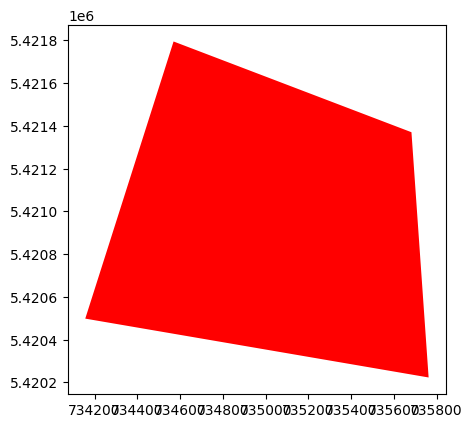

In [2]:
plz = gpd.read_file('data/test_area.geojson') # A small area in Germany
plz['area'] = plz.geometry.area

area_of_interest = plz['geometry']
area_of_interest = area_of_interest.reset_index(drop=True)
area_of_interest.plot(color='red')

## 2. (Optional) we implemented a feature so you can pass to the image downloader also a mask in addition to the area shape so you will only download images in the area that overlap with the given mask. ##
1. This is optional if you dont give the mask when coalling the download function it will download all images in the area
2. As example we load a mask which countains information on area with building in Bavaria, so we will only download orthophotos in the area that also countains buildings

<Axes: >

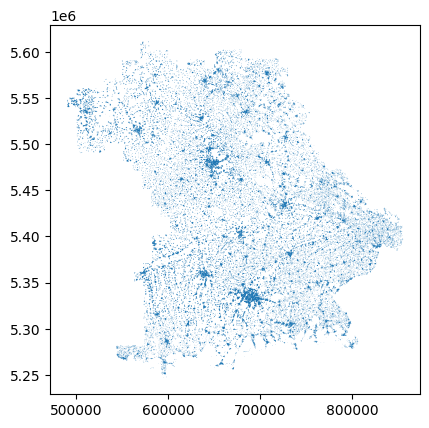

In [3]:
building_mask = gpd.read_file('data/building_mask_bayern_census_buffer_100.geojson').geometry
building_mask = building_mask.reset_index(drop=True)
building_mask.plot()

## 3. Now that we have loaded the area geoinformation and the optional mask, the next step will be to instanciate the image downloader ##

Currently downloader are available for 2 Regions, Bavaria and Baden Würtemberg. There is also one for whole germany based on the wms service from the [BKG](https://gdz.bkg.bund.de/index.php/default/webdienste/digitale-orthophotos/wms-digitale-orthophotos-bodenauflosung-20-cm-wms-dop.html), but to use it you will have to contact them to get a paid access and an uuid that you cna then use with this library to download the images via python.

In the Future we plan to automatically instanciate the downloader necessary for your area, but for now you will have to manually instanciate the one that covers your download area, here we will instanciate the one for bavaria

In [4]:
from pathlib import Path

In [5]:
# Parameters for the downloader
TILE_SIZE = 1000  # tile size in meters -> the are will be divided in squared images of size TILE_SIZE * TILE_SIZE
BUFFER_SIZE = 250  # buffer size in meters -> buffer used to scrap all images at the border of the area and the computed grid -> see next steps
# to save the images
AREA_NAME = 'Alteglofsheim'
OUT_PATH = Path(f'data/{AREA_NAME}/test_datascraping')

In [6]:
from orthophotos_downloader.data_scraping.wms_germany import BayernDop40ImageDownloader

In [7]:
downloader = BayernDop40ImageDownloader(grid_spacing=TILE_SIZE)

## 4. (Optional) display the grid that will be use to split the area in squared images ##
In orthophotos-downloader we first divide the given area in a grid to download multiple squared images, you can checkout the grid using this code.
In Black you can see the masking (if you used a mask) only the tile that intersect with it will be downloaded

<Axes: >

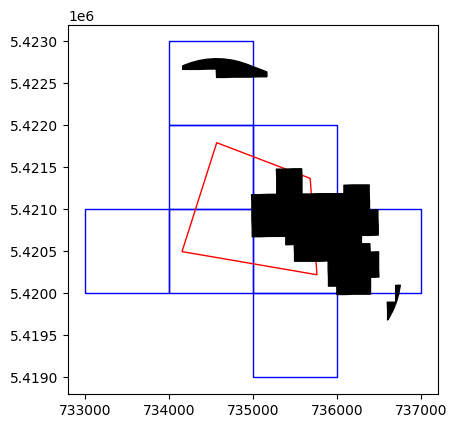

In [8]:
ax = downloader._make_grid(
    area_polygon=area_of_interest.geometry.iloc[0], buffer_size=BUFFER_SIZE, grid_spacing=TILE_SIZE
).plot(facecolor='none', edgecolor='blue')
area_of_interest.plot(ax=ax, facecolor='none', edgecolor='red')

# buffer the area_of_interest and plot the intersection with the building_mask
building_mask.intersection(area_of_interest.buffer(TILE_SIZE)).plot(ax=ax, facecolor='black', edgecolor='black')

## 5. Download the images

In [9]:
result = downloader.download_images_from_polygon(
    area_name=AREA_NAME,
    area_polygon=area_of_interest.geometry,
    buffer_size=BUFFER_SIZE,
    out_path=OUT_PATH,
)

times = [img.download_time for img in result.images]

print(
    f"Downloaded {len(result.images)} images in {sum(times):.2f} seconds. Average: {sum(times) / len(result.images):.2f} seconds per image."
)

[2025-02-21 16:47:06 - INFO - orthophotos_downloader.data_scraping.image_download] Downloading 8 images for Alteglofsheim...
[2025-02-21 16:47:06 - INFO - orthophotos_downloader.data_scraping.image_download] Start downloading image 1 of 8...
[2025-02-21 16:47:08 - INFO - orthophotos_downloader.data_scraping.image_download] Image saved to data/Alteglofsheim/test_datascraping/1.tiff
[2025-02-21 16:47:08 - INFO - orthophotos_downloader.data_scraping.image_download] Finished downloading image 1 in 2.76 seconds.

[2025-02-21 16:47:08 - INFO - orthophotos_downloader.data_scraping.image_download] Start downloading image 2 of 8...
[2025-02-21 16:47:10 - INFO - orthophotos_downloader.data_scraping.image_download] Image saved to data/Alteglofsheim/test_datascraping/2.tiff
[2025-02-21 16:47:10 - INFO - orthophotos_downloader.data_scraping.image_download] Finished downloading image 2 in 1.93 seconds.

[2025-02-21 16:47:10 - INFO - orthophotos_downloader.data_scraping.image_download] Start download

The images are written with the geo location in the metadata, otherwise you can directly use the returned AreaDataset object (in our examples "results") and use the .images field to get the list of paths of download images along with the geo information

In [10]:
result.images

[Image(image_path=PosixPath('data/Alteglofsheim/test_datascraping/1.tiff'), mask_path=None, upper_left_x=733000.0, upper_left_y=5421000.0, download_time=2.760272740997607, width_m=1000.0, height_m=1000.0, width_px=2500, height_px=2500, resolution_m=0.4, crs='EPSG:25832'),
 Image(image_path=PosixPath('data/Alteglofsheim/test_datascraping/2.tiff'), mask_path=None, upper_left_x=734000.0, upper_left_y=5421000.0, download_time=1.9301020960010646, width_m=1000.0, height_m=1000.0, width_px=2500, height_px=2500, resolution_m=0.4, crs='EPSG:25832'),
 Image(image_path=PosixPath('data/Alteglofsheim/test_datascraping/3.tiff'), mask_path=None, upper_left_x=734000.0, upper_left_y=5422000.0, download_time=1.6662529870009166, width_m=1000.0, height_m=1000.0, width_px=2500, height_px=2500, resolution_m=0.4, crs='EPSG:25832'),
 Image(image_path=PosixPath('data/Alteglofsheim/test_datascraping/4.tiff'), mask_path=None, upper_left_x=734000.0, upper_left_y=5423000.0, download_time=2.1484495110016724, width_